# func-adl Hello World

We will make a plot of Jet $p_T$ from an ATLAS xAOD dataset.

## Prerequisits

1. You need access to a func-adl server. Here we assume it is running a http://localhost:30000, which is the default if you use the helm chart in his package.
2. The python package `funcitonal-adl` must be installed.

In [1]:
from adl_func_client.event_dataset import EventDataset
from adl_func_client.use_exe_func_adl_server import use_exe_func_adl_server
import matplotlib.pyplot as plt

We define the dataset. The URI scheme `localds` tells the system that we want to go after a dataset from the GRID, but downloaded locally.

In [2]:
ds = EventDataset('localds://mc16_13TeV.311309.MadGraphPythia8EvtGen_A14NNPDF31LO_HSS_LLP_mH125_mS5_ltlow.deriv.DAOD_EXOT15.e7270_e5984_s3234_r9364_r9315_p3795')

Next, we build the query. At the end we get a future that will contain the PandasDF with the jet $p_T$'s.

In [3]:
df_future = ds \
        .SelectMany('lambda e: e.Jets("AntiKt4EMTopoJets")') \
        .Select('lambda j: j.pt()/1000.0') \
        .AsPandasDF('JetPt')

The final thing is to turn the future into something real. We tell it to use the `func-adl` server as a back end. This can take a little while:

- If the xAOD's haven't been downloaded, they must be.
- If the JetPt's have to be extracted from the xAOD's, then that must occur.

In [4]:
%%time
df = df_future.value(executor=lambda a: use_exe_func_adl_server(a, node='http://localhost:30000'))

Wall time: 442 ms


And plot the $p_T$.

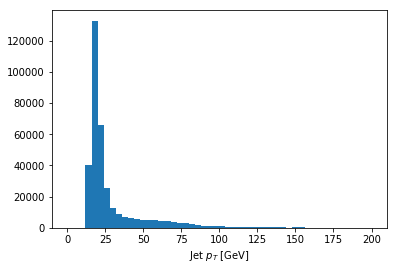

In [5]:
plt.hist(df.JetPt, bins=50,range=(0,200))
plt.xlabel('Jet $p_T$ [GeV]')
plt.show()